## Principal Component Analysis Example  

### Steps:
1. Load the dataset into a matrix $M$.  
2. Remove the mean from each column (centering feature values).  
3. Compute the covariance matrix $C$.  
4. Perform eigenvalue and eigenvector decomposition.  
    $$
    \mathbf{C}=\mathbf{V\Sigma V^{-1}}
    $$
    Where $C$ is the covariance matrix, $V$ is the right eigenvector matrix and $\Sigma$ the diagonal matrix of eigenvalues.

5. Select $m$ out of $n$ eigenvalues, where $m$ is the smallest number such that the cumulative variance explained is at least \($\alpha = 0.95$\):  

   $$  
   \min(m) \quad \text{s.t.} \quad \frac{\sum_{i=1}^{m} \lambda_i}{\sum_{i=1}^{n} \lambda_i} \geq \alpha = 0.95  
   $$  

   where \( \lambda_i \) are the eigenvalues sorted in descending order.
6. Project the dataset matrix to the subspace defined by the $m$ eigenvectors related to the $m$ eigenvalues selected.

    $$  
    M' = V_m^T M  
    $$  

    where $V_m$ is the matrix containing the first $m$ eigenvectors as columns.


In [153]:
import numpy as np
import matplotlib.pyplot as mplot

In [154]:
# 1: load the dataset
filename = r"../Lab2-IRISdataset/iris.csv"
dataset = []
labelset = []
labels = {
	"Iris-setosa":0,
	"Iris-versicolor":1,
	"Iris-virginica":2
}

with open(filename, "r") as file:
	for line in file:
		fields = line.split(",")
		dataset.append(fields[:4])
		labelset.append(labels[fields[4].strip()])
		
dataset = np.array(dataset, dtype=np.float32).reshape((150,4))
labelset = np.array(labelset, dtype=np.int8).reshape((150, 1))

In [155]:
# 2 Centering feature columns

feature_mean = np.mean(dataset, axis=0, dtype=np.float32, keepdims=True)
dataset_centered = dataset - feature_mean

In [156]:
# 3 Computing covariance matrix
covariance_matrix = (dataset_centered.T @ dataset_centered)\
                    /dataset_centered.shape[0]

covariance_matrix

array([[ 0.6811218 , -0.0421511 ,  1.2658201 ,  0.512829  ],
       [-0.0421511 ,  0.1887129 , -0.32745862, -0.12082852],
       [ 1.2658201 , -0.32745862,  3.0955045 ,  1.2869717 ],
       [ 0.512829  , -0.12082852,  1.2869717 ,  0.577133  ]],
      dtype=float32)

In [157]:
# 4 Perform eigenvalues/vectors decomposition
(eigval, eigvect) = np.linalg.eig(covariance_matrix)
(eigval, eigvect)


(array([4.2000546 , 0.24105279, 0.07768784, 0.02367693], dtype=float32),
 array([[ 0.36138648, -0.65658814, -0.58203006,  0.3154882 ],
        [-0.08452249, -0.7301621 ,  0.5979094 , -0.3197243 ],
        [ 0.85667074,  0.1733726 ,  0.07623544, -0.4798389 ],
        [ 0.35828903,  0.07548022,  0.5458329 ,  0.75365657]],
       dtype=float32))

In [158]:
# 5 Choosing m

tot_variance = sum(eigval)
sorted_eigval = np.flip(np.sort(eigval))
sorted_eigvect = eigvect[:, np.flip(eigval.argsort())]
variance_info = np.vstack([sorted_eigval, [v/tot_variance*100 for v in sorted_eigval]])
variance_info

# correct m = 2
m=2

In [159]:
# 6 Projecting the the ortonormal eigenvector space
choosed_eigval = sorted_eigval[0:m]
choosed_eigval
choosed_eigvect = sorted_eigvect[:, 0:m]
choosed_eigvect

projected_dataset_centered = dataset_centered @ choosed_eigvect
projected_dataset = dataset @ choosed_eigvect

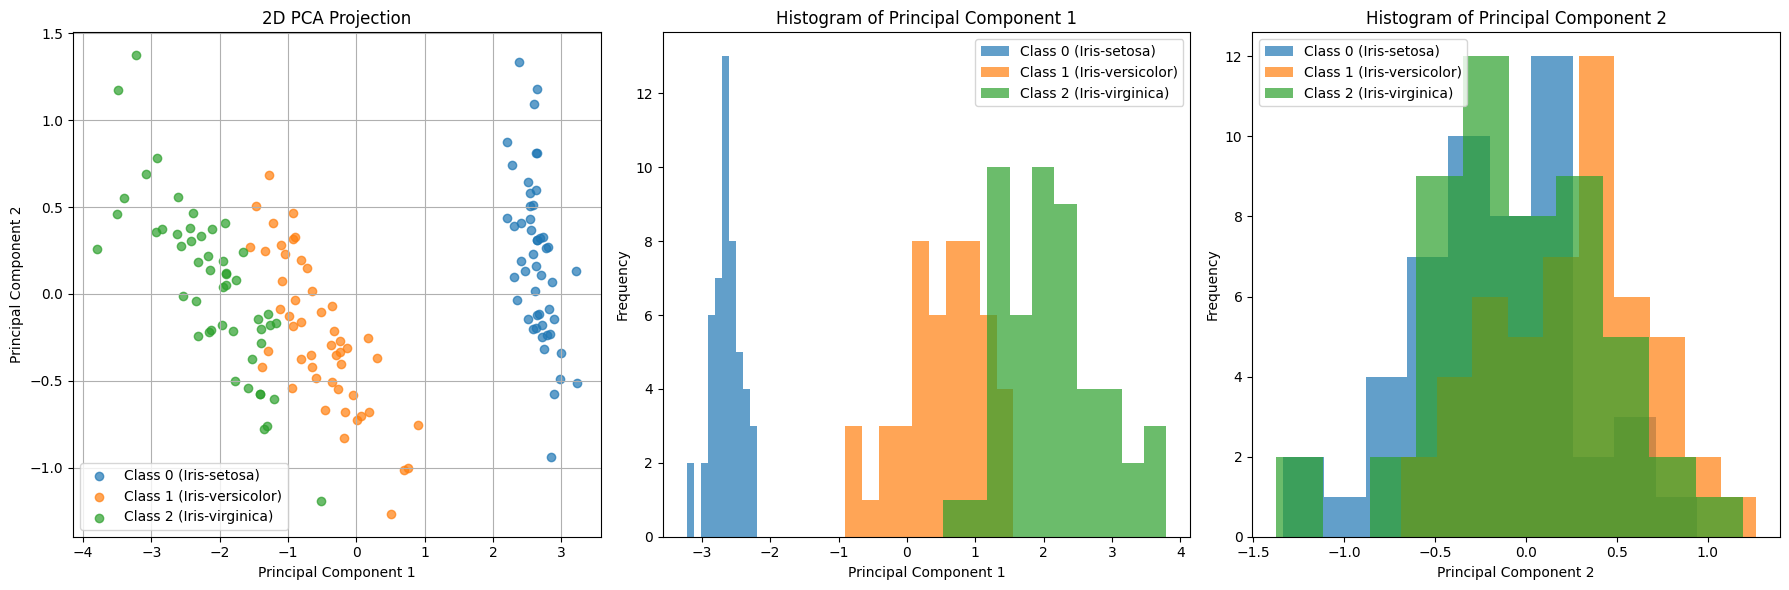

In [160]:
# Create a figure with 1 row and 3 columns
fig, axes = mplot.subplots(1, 3, figsize=(18, 6))

# Separate the projected dataset into classes
class_0 = projected_dataset_centered[labelset.flatten() == 0]
class_1 = projected_dataset_centered[labelset.flatten() == 1]
class_2 = projected_dataset_centered[labelset.flatten() == 2]

# Scatter plot
axes[0].scatter(-class_0[:, 0], -class_0[:, 1], label="Class 0 (Iris-setosa)", alpha=0.7)
axes[0].scatter(-class_1[:, 0], -class_1[:, 1], label="Class 1 (Iris-versicolor)", alpha=0.7)
axes[0].scatter(-class_2[:, 0], -class_2[:, 1], label="Class 2 (Iris-virginica)", alpha=0.7)
axes[0].set_title("2D PCA Projection")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].legend()
axes[0].grid(True)

# Histogram of the first feature
axes[1].hist(class_0[:, 0], bins=10, alpha=0.7, label="Class 0 (Iris-setosa)")
axes[1].hist(class_1[:, 0], bins=10, alpha=0.7, label="Class 1 (Iris-versicolor)")
axes[1].hist(class_2[:, 0], bins=10, alpha=0.7, label="Class 2 (Iris-virginica)")
axes[1].set_title("Histogram of Principal Component 1")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Histogram of the second feature
axes[2].hist(class_0[:, 1], bins=10, alpha=0.7, label="Class 0 (Iris-setosa)")
axes[2].hist(class_1[:, 1], bins=10, alpha=0.7, label="Class 1 (Iris-versicolor)")
axes[2].hist(class_2[:, 1], bins=10, alpha=0.7, label="Class 2 (Iris-virginica)")
axes[2].set_title("Histogram of Principal Component 2")
axes[2].set_xlabel("Principal Component 2")
axes[2].set_ylabel("Frequency")
axes[2].legend()

# Adjust layout and show the plot
mplot.tight_layout()
mplot.show()



## Linear component analysis example

### Steps:
1. **Within class covariance matrix**  
    1. *Find the mean for each class $c$*, which is simply the average of all the feature values for all samples in class $c$.  
        $$
        \mathbf{\mu_c} = \frac{1}{N_c} \sum_{i=1}^{N_c} \mathbf{x}_{c,i}
        $$
        Where:
        - $c$ is the class,
        - $i$ is the index of the sample within the class $c$,
        - $N_c$ is the number of samples in class $c$,
        - $x_{c,i}$ is the feature vector of the $i$-th sample in class $c$.

        **Note:** $\mu_c$ is a vector containing the average for each feature of the samples of class $c$.

    2. *Calculate the within class covariance matrix* as 
        $$
        \mathbf{S_{within}} = \frac{1}{N} \sum_{c=1}^{K} \sum_{i=1}^{N_c} (\mathbf{x}_{c,i} - \mathbf{\mu_c})(\mathbf{x}_{c,i} - \mathbf{\mu_c})^T
        $$

        Where:
        - $N$ is the total number of samples,
        - $K$ is the number of classes,
        - $N_c$ is the number of samples in class $c$,
        - $x_{c,i}$ is the feature **column** vector of the $i$-th sample in class $c$,
        - $\mu_c$ is the mean vector of class $c$.

        **Note:** The result is a matrix of dimensions $D \times D$ (where $D$ is the number of features), which captures the variance and covariance between the features within each class. Can be seen as a weighted average of the covariance matrix of each class. 

2. **Between class covariance matrix**  
    1. *Calculate the entire dataset mean $ \mu $* as 
        $$
        \mathbf{\mu} = \frac{1}{N} \sum_{c=1}^{K} \sum_{i=1}^{N_c} \mathbf{x}_{c,i}
        $$

        Where:
        - $ N $ is the total number of samples in the dataset,
        - $ K $ is the number of classes,
        - $ N_c $ is the number of samples in class $ c $,
        - $ x_{c,i} $ is the feature vector of the $ i $-th sample in class $ c $.

        **Note:** $ \mu $ is a vector containing the average value for each feature of the entire dataset (all samples across all classes).

    2. *Calculate the between-class covariance matrix* as 
        $$
        \mathbf{S_{between}} = \frac{1}{N} \sum_{c=1}^{K} N_c \mathbf{(\mu_c - \mu)} \mathbf{(\mu_c - \mu)}^T
        $$

        Where: 
        - $S_{between}$ is the between-class covariance matrix,
        - $N$ is the total number of samples in the dataset,
        - $K$ is the number of classes,
        - $N_c$ is the number of samples in class $c$,
        - $\mu_c$ is the mean vector of class $c$,
        - $\mu$ is the mean vector of the entire dataset.

        **Note:** The between-class covariance matrix $S_{between}$ represents the variability between the different classes in the dataset. Can be interpreted as a covariance matrix for the class means, where each class i weighted by the corresponding sample size $n_c$.

        **Note:** $S_B+S_W$ is the covariance matrix of the whole dataset.

3. **Solve the problem of maximize between class variance and minimize within class variance**
    1. *Compute $S_{within}^{-1} S_{between}$*
    2. *Compute eigenvalues and eigenvectors*
    3. *Take at most C-1 eigenvalues and eigenvectors*
4. **Project the dataset in the new subspace**
    $$
    \mathbf{X'} = \mathbf{X} \cdot \mathbf{W}
    $$

    Where:
    - $\mathbf{X}$ is the original dataset matrix with dimensions $N \times d$, where $N$ is the number of samples and $d$ is the number of features.
    - $\mathbf{W}$ is the matrix of selected eigenvectors (with dimensions $d \times m$, where $m$ is the number of selected eigenvectors).
    - $\mathbf{X'}$ is the projected dataset matrix with dimensions $N \times m$, where $m$ is the number of dimensions in the new subspace (typically $m = K-1$ for LDA, where $K$ is the number of classes).

    **Note:** The resulting matrix $\mathbf{X'}$ represents the dataset projected onto a new subspace defined by the selected eigenvectors, reducing the dimensionality of the data while preserving class separability.

In [161]:
# 1 within class covariance

# 1.1 mean for each class
classes = [dataset[labelset.flatten() == i] for i in range(3)]
means = [cls.mean(axis=0) for cls in classes]

# 1.2 within class covariance matrix
sample_counts = [cls.shape[0] for cls in classes]
totsample = sum(sample_counts)

def covariance(samples, average):
    return (samples - average).T @ (samples - average)

s_within = sum([covariance(c,m) for (c, m) in zip(classes, means) ])/totsample

s_within

array([[0.25970796, 0.09086665, 0.16416402, 0.03763333],
       [0.09086665, 0.11308001, 0.05413866, 0.032056  ],
       [0.16416402, 0.05413866, 0.181484  , 0.041812  ],
       [0.03763333, 0.032056  , 0.041812  , 0.04104401]], dtype=float32)

In [162]:
# 2 between class covariance

# 2.1 entire dataset mean 
global_mean = dataset.mean(0)

# 2.2 calculate between class covariance matrix
s_between= np.zeros((dataset.shape[1], dataset.shape[1]))
for m, count in zip(means, sample_counts):
    diff = (m - global_mean).reshape(-1,1)  # Difference between class mean and global mean
    s_between += count * (diff @ diff.T)  # Update the between-class covariance

s_between/=totsample
s_between

array([[ 0.42141425, -0.13301799,  1.10165635,  0.47519567],
       [-0.13301799,  0.07563293, -0.38159739, -0.15288445],
       [ 1.10165635, -0.38159739,  2.91401927,  1.24516029],
       [ 0.47519567, -0.15288445,  1.24516029,  0.53608906]])

In [163]:
# 3 eigenvalues and eigenvectors decomposition
covariance_matrix = np.linalg.inv(s_within)@s_between
[eigval, eigvect] = np.linalg.eigh(covariance_matrix)

# Select the first m eigenvalues and eigenvectors (m = min(C-1, F))
m = min(3 - 1, covariance_matrix.shape[0])  # Assuming 3 classes
sel_eigval = eigval[-m:]  # The largest m eigenvalues
sel_eigvec = eigvect[:, -m:]  # Corresponding eigenvectors

In [164]:
# 4 project the dataset in the subspace

dataset_lda = dataset @ sel_eigvec

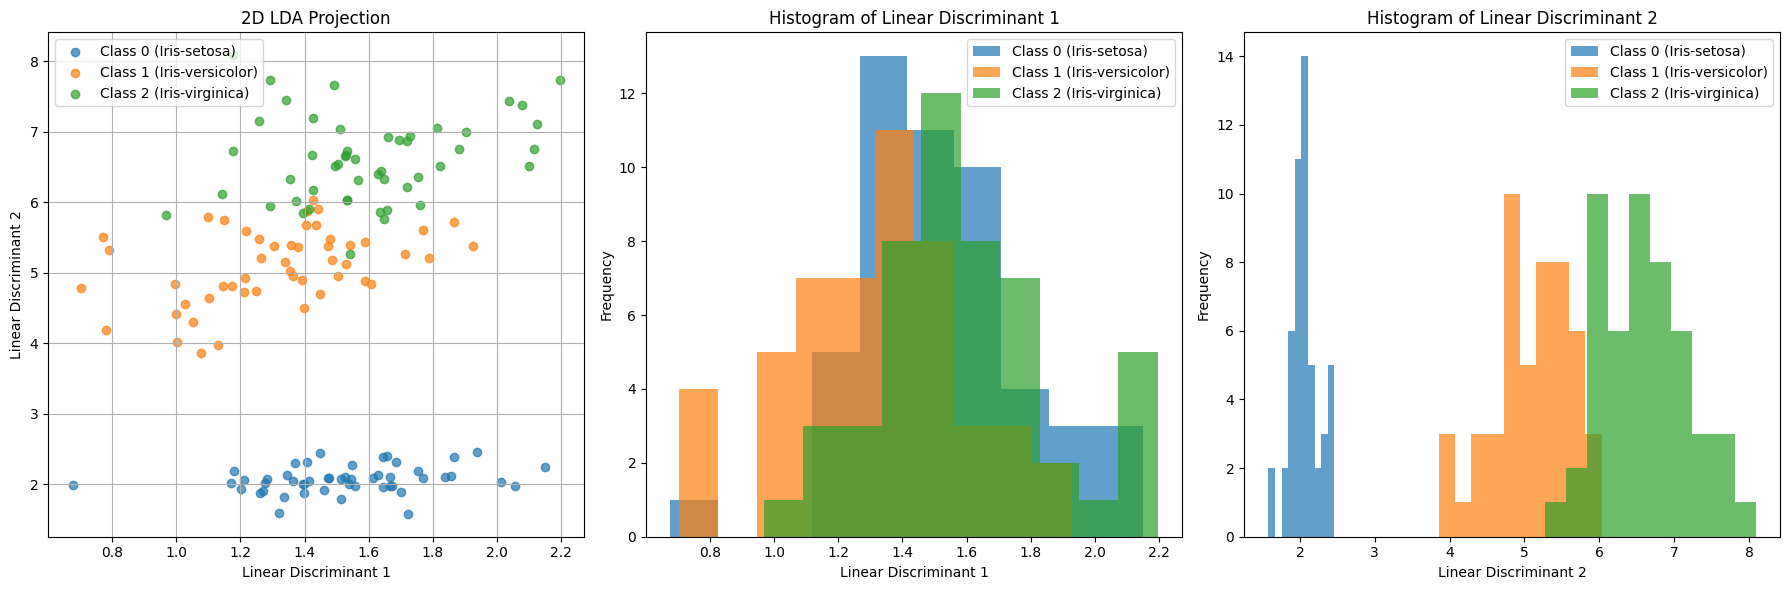

In [166]:
# Create a figure with 1 row and 3 columns
fig, axes = mplot.subplots(1, 3, figsize=(18, 6))

# Separate the projected dataset into classes
class_0 = dataset_lda[labelset.flatten() == 0]
class_1 = dataset_lda[labelset.flatten() == 1]
class_2 = dataset_lda[labelset.flatten() == 2]

# Scatter plot
axes[0].scatter(class_0[:, 0], class_0[:, 1], label="Class 0 (Iris-setosa)", alpha=0.7)
axes[0].scatter(class_1[:, 0], class_1[:, 1], label="Class 1 (Iris-versicolor)", alpha=0.7)
axes[0].scatter(class_2[:, 0], class_2[:, 1], label="Class 2 (Iris-virginica)", alpha=0.7)
axes[0].set_title("2D LDA Projection")
axes[0].set_xlabel("Linear Discriminant 1")
axes[0].set_ylabel("Linear Discriminant 2")
axes[0].legend()
axes[0].grid(True)

# Histogram of the first feature
axes[1].hist(class_0[:, 0], bins=10, alpha=0.7, label="Class 0 (Iris-setosa)")
axes[1].hist(class_1[:, 0], bins=10, alpha=0.7, label="Class 1 (Iris-versicolor)")
axes[1].hist(class_2[:, 0], bins=10, alpha=0.7, label="Class 2 (Iris-virginica)")
axes[1].set_title("Histogram of Linear Discriminant 1")
axes[1].set_xlabel("Linear Discriminant 1")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Histogram of the second feature
axes[2].hist(class_0[:, 1], bins=10, alpha=0.7, label="Class 0 (Iris-setosa)")
axes[2].hist(class_1[:, 1], bins=10, alpha=0.7, label="Class 1 (Iris-versicolor)")
axes[2].hist(class_2[:, 1], bins=10, alpha=0.7, label="Class 2 (Iris-virginica)")
axes[2].set_title("Histogram of Linear Discriminant 2")
axes[2].set_xlabel("Linear Discriminant 2")
axes[2].set_ylabel("Frequency")
axes[2].legend()

# Adjust layout and show the plot
mplot.tight_layout()
mplot.show()
